In [1]:
%matplotlib inline
import keras
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl # Plotting stuff







Using TensorFlow backend.


In [64]:
data=pd.read_csv('ADNI_Training_Q3_APOE_CollectionADNI1Complete 1Yr 1.5T_July22.2014.csv')

In [63]:
data.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/05,AD,9/12/05,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11/8/05,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/05,CN,9/7/05,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,11/29/05,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11/7/05,AD,11/10/05,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD


In [4]:
data.drop(['directory.id','Image.Data.ID','Acq.Date','Visit','EXAMDATE','Dx Codes for Submission','Subject','Modality','APOE Genotype'],axis=1,inplace=True)

In [5]:
data.shape

(628, 10)

In [6]:
data= data.fillna(method='ffill')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 10 columns):
RID                 628 non-null int64
DX.bl               628 non-null object
AGE                 628 non-null float64
PTGENDER            628 non-null object
PTEDUCAT            628 non-null int64
PTETHCAT            628 non-null object
PTRACCAT            628 non-null object
APOE4               628 non-null int64
MMSE                628 non-null int64
imputed_genotype    628 non-null bool
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 44.8+ KB


In [8]:
%pylab inline
#lets plot some graphics from the first dataset

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
cols = ['RID','DX.bl', 'AGE', 'PTGENDER', 'PTETHCAT', 'MMSE','imputed_genotype','APOE Genotype']
x=data.fillna('')
sns_plot = sns.pairplot(x[cols])

Populating the interactive namespace from numpy and matplotlib


KeyError: "['APOE Genotype'] not in index"

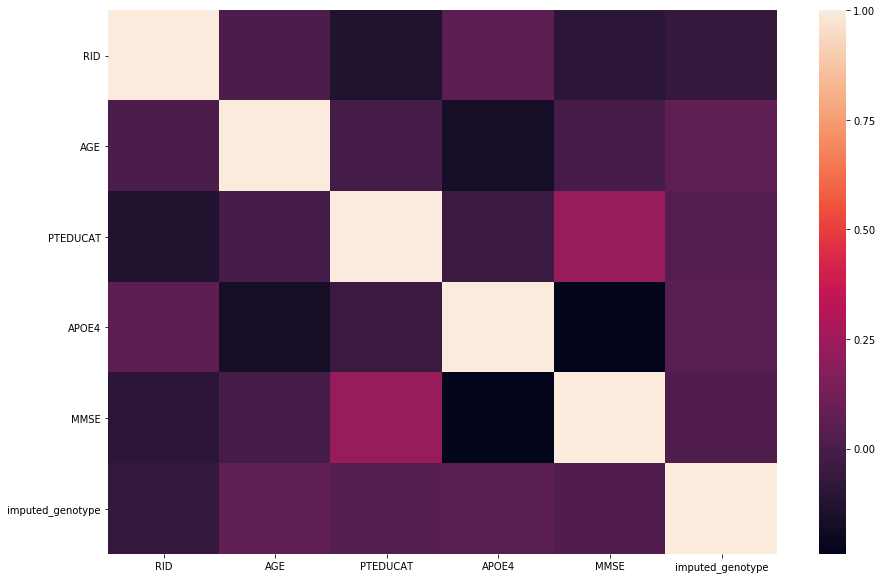

In [9]:
#lets plot correleation matrix
corr_matrix =data.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix)

([<matplotlib.axis.XTick at 0x7f1fc5374240>,
 <a list of 10 Text xticklabel objects>)

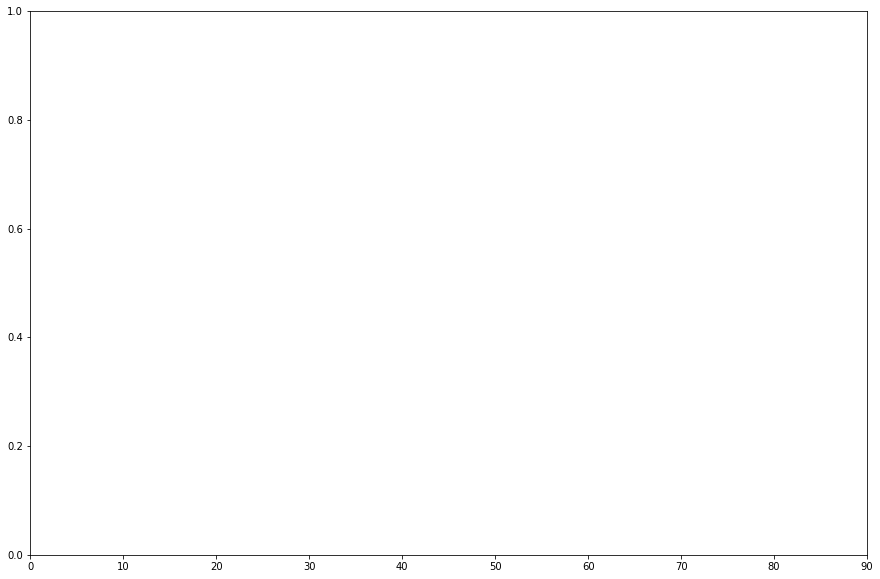

In [10]:
xticks(np.arange(0, 100, step=10))

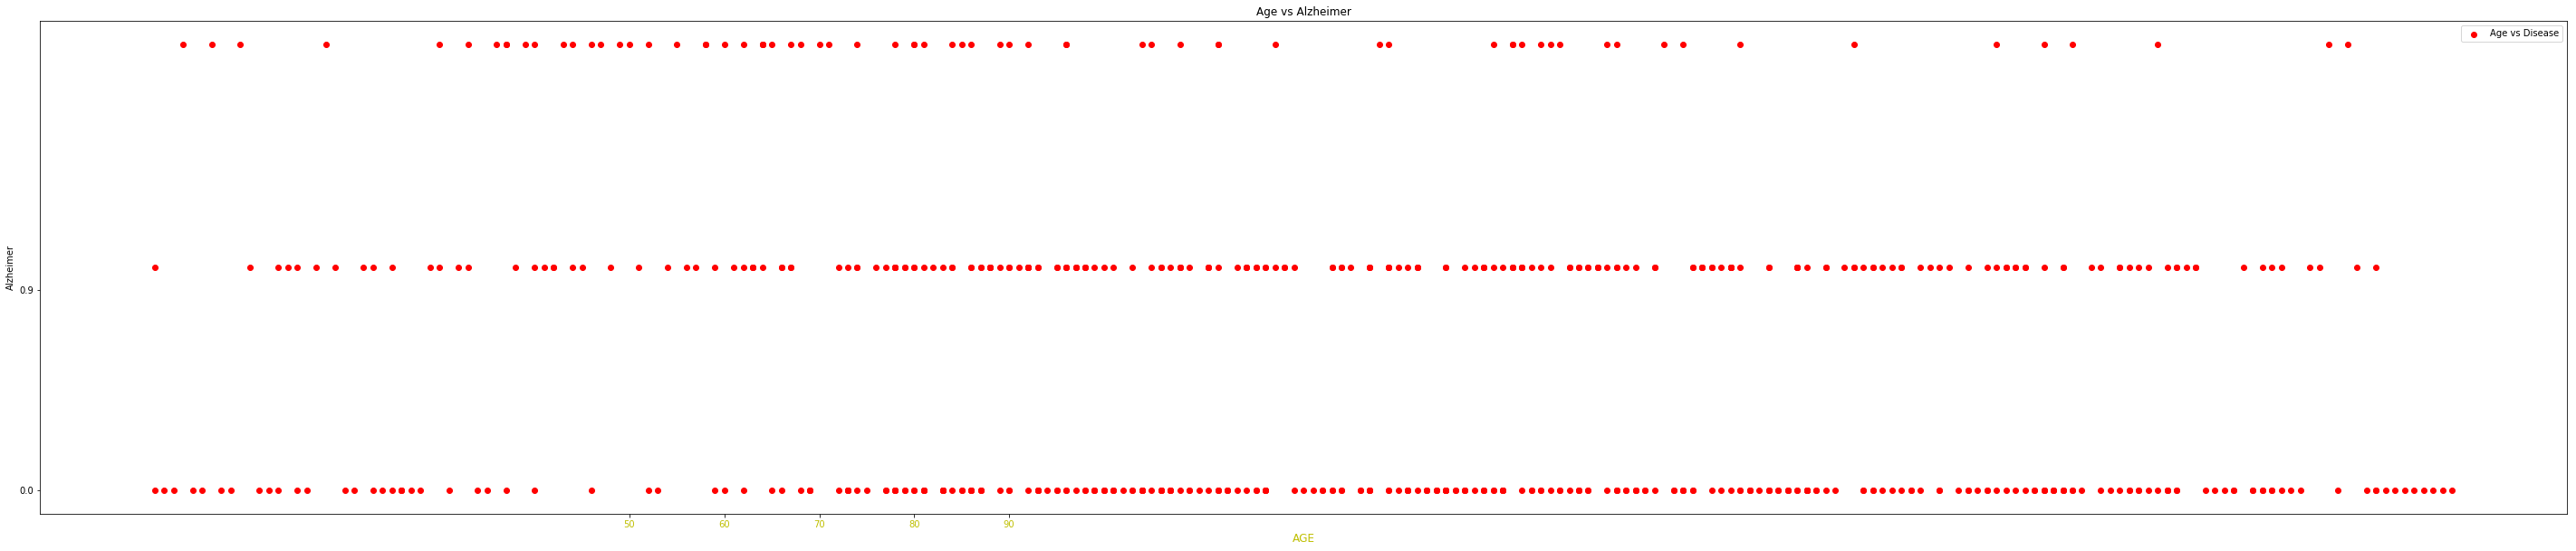

In [14]:
plt.figure(figsize=(50,10))
plt.scatter(data['AGE'],data['APOE4'],label='Age vs Disease',color='r')
# plt.bar(data['PTGENDER'],data['APOE4'],label='Gender vs Disease',width=0.8)
plt.ylabel('Alzheimer')
plt.xlabel('AGE',fontsize='large',color='y')
plt.xticks(np.arange(50, 100, step=10),color='y')
plt.yticks(np.arange(0, 1, step=0.9))
plt.title('Age vs Alzheimer')
plt.legend()

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
for x in data.columns:
    f = LabelEncoder()
    data[x] = f.fit_transform(data[x])

In [16]:
(data[int('APOE4')>1]=data['APOE4']


SyntaxError: invalid syntax (<ipython-input-16-1f98b654b7e3>, line 1)

In [17]:
data.head()

,RID,DX.bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype
0,0,0,183,1,12,1,2,1,0,1
1,1,2,53,1,4,0,2,0,7,0
2,2,1,109,1,10,1,2,0,9,1
3,3,2,174,0,7,1,2,0,5,1
4,4,0,111,0,6,1,2,1,4,1


# Lets begin some machine learning

In [66]:
train, test = train_test_split(data, test_size=0.3)

In [19]:
X_train = train[['RID','DX.bl','AGE','PTGENDER','PTEDUCAT','PTETHCAT','PTRACCAT','MMSE','imputed_genotype']]
y_train = train.APOE4
X_test = test[['RID','DX.bl','AGE','PTGENDER','PTEDUCAT','PTETHCAT','PTRACCAT','MMSE','imputed_genotype']]
y_test = test.APOE4

###  Standardizing data set

In [20]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [21]:
y_train=np.ravel(y_train)
X_train=np.asarray(X_train)

y_test=np.ravel(y_test)
X_test=np.asarray(X_test)


In [22]:
# plt.figure(figsize=(1,1))
plt.scatter(train['APOE4'],y_train['PTGENDER'],label='Gender vs Disease')
# plt.bar(data['PTGENDER'],data['APOE4'],label='Gender vs Disease',width=0.8)
plt.xlabel('Alzheimer')
plt.ylabel('Gender',fontsize='large')
plt.xticks(np.arange(50, 100, step=10))
plt.yticks(np.arange(0, 1, step=0.9))
plt.title('Age vs Alzheimer')
plt.legend()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#  So We're starting with Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [24]:
classifier.score(X_test, y_test)

0.5291005291005291

In [25]:
classifier.score(X_train, y_train)

0.55125284738041

# Now we're trying Decision Trees

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print (classifier.score(X_train, y_train))
print (classifier.score(X_test, y_test))

0.5261958997722096
0.5079365079365079


# Now we're trying K Neighbors, with n:=2

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
prediction = knn.predict(X_test)
print(knn.score(X_test, y_test))


0.7220956719817767
0.5079365079365079


# Now we're trying Support Vector machine with poly kernel

In [41]:
from sklearn.svm import SVC
svc=SVC(kernel="poly", C=0.001)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [42]:
svc.score(X_test, y_test)

0.5079365079365079

In [43]:
svc.score(X_train, y_train)

0.5170842824601367

In [31]:
X_train.shape

(439, 9)

## Now trying Deep neural network using TENSORFLOW

In [56]:
import tensorflow as tf
from sklearn import metrics
feature_x = 'x'  # Name of the input feature.
feature_columns = [tf.feature_column.numeric_column(feature_x, shape=np.array(X_train).shape[1:])]

classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns, hidden_units=[20,20], n_classes=4)

  # Training the network
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={feature_x: X_train}, y=y_train, num_epochs=100, shuffle=False)
classifier.train(input_fn=train_input_fn, steps=1000)

  # Predict.
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={feature_x: X_test}, y=y_test, num_epochs=1, shuffle=False)
predictions = classifier.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['class_ids'] for p in predictions))
y_predicted = y_predicted.reshape(np.array(y_test).shape)

  # Score with sklearn.
score = metrics.accuracy_score(y_test, y_predicted)
print('Accuracy (sklearn): {0:f}'.format(score))

  # Score with tensorflow.
scores = classifier.evaluate(input_fn=test_input_fn)
print('Accuracy (tensorflow): {0:f}'.format(scores['accuracy']))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmprv2rbgnb', '_is_chief': True, '_log_step_count_steps': 100, '_tf_random_seed': None, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1fc0c19c18>, '_service': None, '_master': '', '_task_id': 0, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_task_type': 'worker'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmprv2rbgnb/model.ckpt.
INFO:tensorflow:step = 1, loss = 277.145
INFO:tensorflow:global_step/sec: 547.754
INFO:tensorflow:step = 101, loss = 91.2128 (0.183 sec)
INFO:tensorflow:global_step/sec: 621.681
INFO:tensorflow:step = 201, loss = 78.587585 (0.161 sec)
INFO:tensorflow:global_step/sec: 611.798
INFO:tensorflow:step = 301

In [55]:
data.head()

,RID,DX.bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype
0,0,0,183,1,12,1,2,1,0,1
1,1,2,53,1,4,0,2,0,7,0
2,2,1,109,1,10,1,2,0,9,1
3,3,2,174,0,7,1,2,0,5,1
4,4,0,111,0,6,1,2,1,4,1


In [51]:
age_hist = train.AGE(bins=15)

age_hist.set_xlabel('Age in years')
age_hist.set_ylabel('Record count')
age_hist.set_title('Age at time of scan',fontsize=16)

TypeError: 'Series' object is not callable